In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_parquet('raw_brooklyn.parquet')
df.shape

(171, 14)

In [154]:
df.head()

,id,date_collected,retailer_type,retailer_detail,food_type,food_detail,label_type,label_language,label_date,approximate_dollar_value,image_id,collection_lat,collection_long,label_explanation
0,5e31d5503b85a2e63d634187,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1872,40.69453,-73.99447,
1,5e31d5643b85a2e63d634188,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1873,40.69453,-73.99447,
2,5e31d8903b85a2e63d634189,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic middle eastern salad,sticker,use by,2020-01-28,10.00,IMG_1874,40.69453,-73.99447,
3,5e31dcee3b85a2e63d63418a,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,6.25,IMG_1875,40.69453,-73.99447,
4,5e31dd273b85a2e63d63418b,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic mexican salad,sticker,use by,2020-01-28,10.00,IMG_1876,40.69453,-73.99447,


In [155]:
df.dtypes

id                           object
date_collected               object
retailer_type                object
retailer_detail              object
food_type                    object
food_detail                  object
label_type                   object
label_language               object
label_date                   object
approximate_dollar_value    float64
image_id                     object
collection_lat              float64
collection_long             float64
label_explanation            object
dtype: object

In [156]:
df['label_date'].drop_duplicates(inplace = False)

0      2020-01-28
5      2020-01-30
9      2020-02-11
12           2020
13     2020-03-25
          ...    
157    2021-02-05
163    2021-02-04
164    2021-07-20
169    2021-12-12
170    2022-07-01
Name: label_date, Length: 63, dtype: object

In [173]:
# security check : length of date columns if <10 then delete
date_cols = ['date_collected', 'label_date']
for col in date_cols:
    len_col = 'len_' + col
    df[len_col] = df[col].astype('string').str.strip().str.len()
    df = df[df[len_col] == 10]
    df = df.drop(columns = [len_col])


In [182]:
df.shape

(163, 14)

In [176]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [177]:
df.dtypes

id                                  object
date_collected              datetime64[ns]
retailer_type                       object
retailer_detail                     object
food_type                           object
food_detail                         object
label_type                          object
label_language                      object
label_date                  datetime64[ns]
approximate_dollar_value           float64
image_id                            object
collection_lat                     float64
collection_long                    float64
label_explanation                   object
dtype: object

## categorical columns exploration

In [8]:
cat_columns = ['retailer_type', 'retailer_detail', 'food_type', 'food_detail', 'label_type', 'label_language', 'label_explanation']

### Counts per category

In [9]:
for col in cat_columns:
    no_cat = df[col].drop_duplicates().count()
    print('\n Column ', col, ' has ', no_cat, ' categories. \n')
    df_grouped = df.groupby(col)['id'].agg('count').reset_index(name='count')\
                        .sort_values('count', ascending = False)
    print(df_grouped)


 Column  retailer_type  has  6  categories. 

        retailer_type  count
4           drugstore     52
5  health food grocer     39
0         bakery/deli     35
1        chain grocer     34
3     counter service      9
2          coffeeshop      2

 Column  retailer_detail  has  5  categories. 

                                     retailer_detail  count
2        ready-to-eat, shelf-stable, and frozen food     52
4  ready-to-eat, shelf-stable, frozen, and perish...     39
0                  ready-to-eat and prepackaged food     37
3  ready-to-eat, shelf-stable, frozen, and perish...     34
1           ready-to-eat and prepackaged health food      9

 Column  food_type  has  4  categories. 

      food_type  count
1    perishable    102
0      packaged     49
2  ready-to-eat     16
3  shelf stable      4

 Column  food_detail  has  84  categories. 

                               food_detail  count
83                                  yogurt     18
24               flatbread pepperoni 

### Count plots

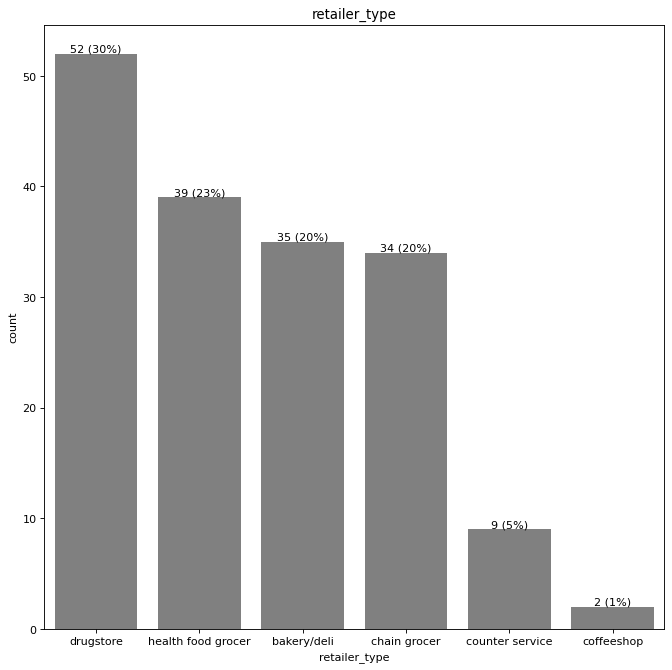

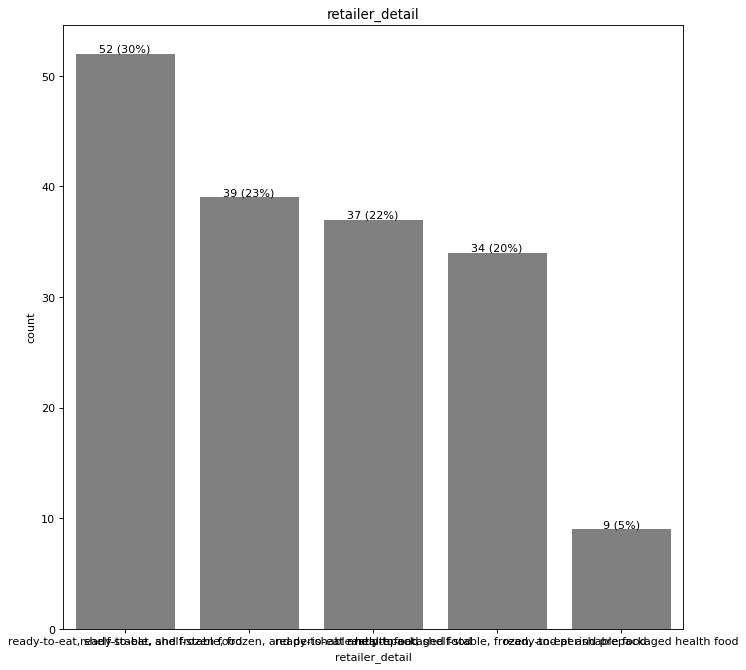

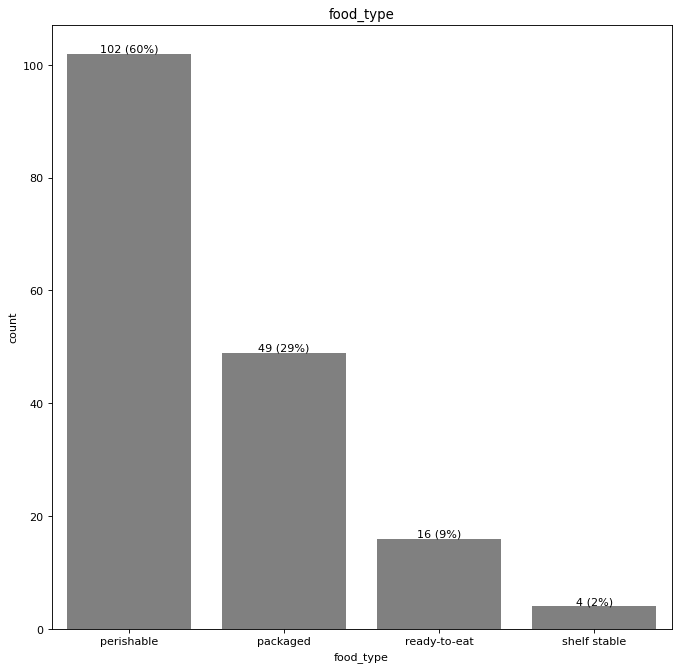

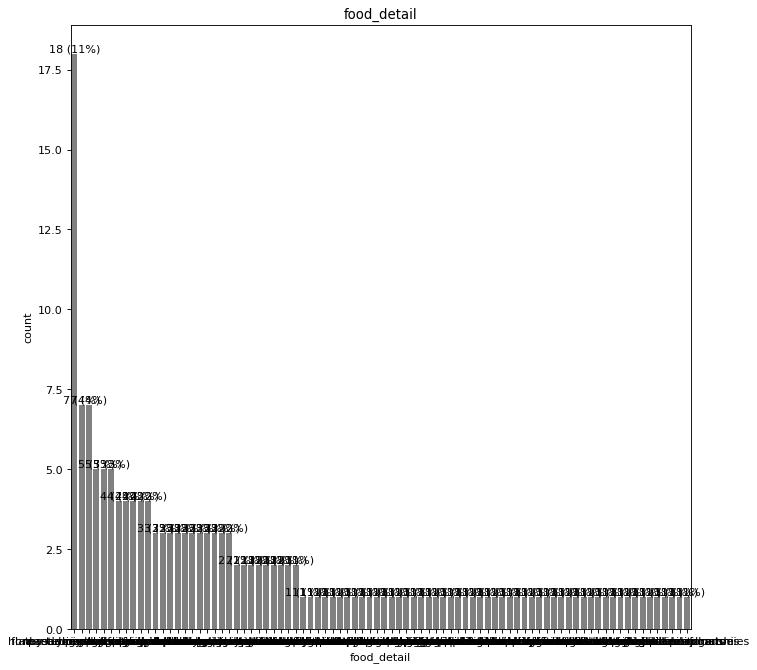

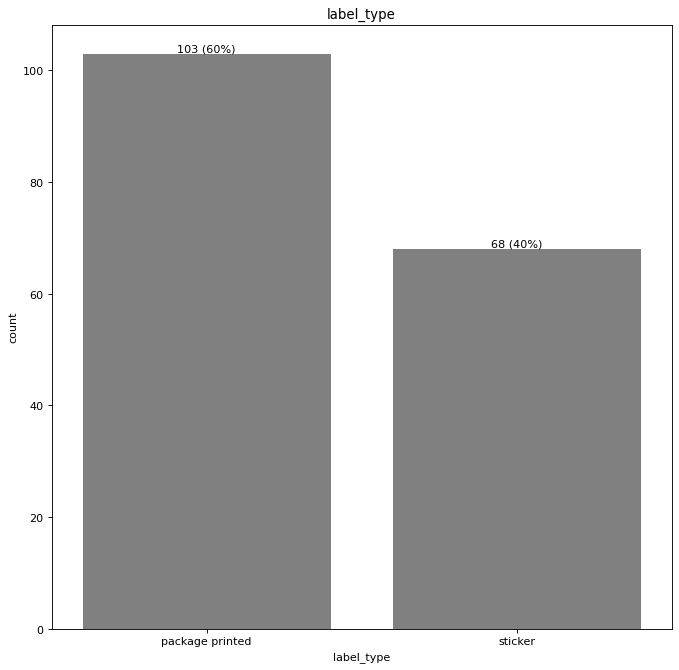

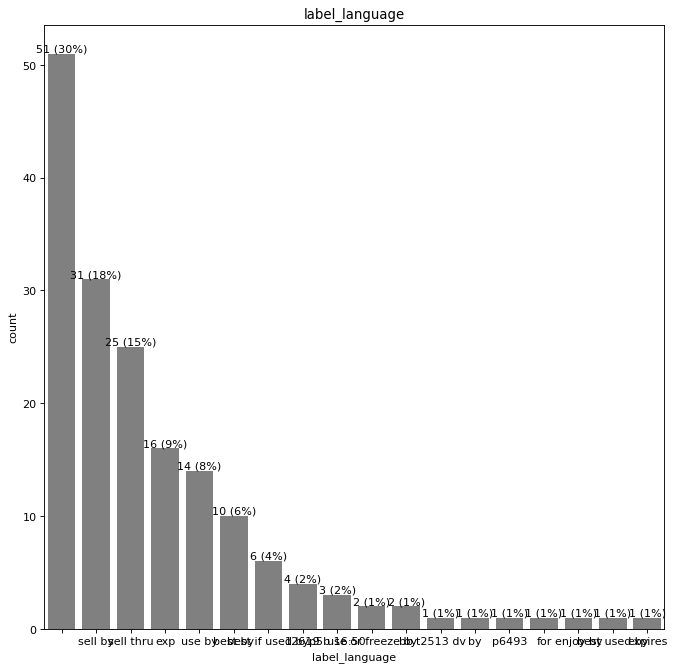

In [35]:
for col in cat_columns:
    plt.figure(figsize=(10, 10), dpi=80)
    ax = sns.countplot(x = df[col],
                       order = df[col].value_counts(ascending=False).index,
                      color = 'grey')
    abs_values = df[col].value_counts(ascending=False).values
    rel_values = df[col].value_counts(ascending=False, normalize=True).values * 100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=labels)
    ax.set_title(col)
    plt.show()

In [184]:
retailer_detail_values = list(df.retailer_detail.drop_duplicates())
retailer_detail_values

['ready-to-eat and prepackaged health food',
 'ready-to-eat, shelf-stable, frozen, and perishable health food',
 'ready-to-eat, shelf-stable, and frozen food',
 'ready-to-eat and prepackaged food',
 'ready-to-eat, shelf-stable, frozen, and perishable food']